# PIP INSTALL

In [1]:
# %pip install scipy
# %pip install matplotlib
# %pip install SpeechRecognition
# %pip install wave
# %pip install librosa
# %pip install ipython

# PART 1

Conversão para .WAV

In [2]:
# import required modules
# import subprocess

# # # # convert to wav file
# subprocess.call(['ffmpeg', '-i', 'moli_assovio_2.ogg',
#                   'moli_assovio_2.wav'])

Conversão audios estereos para mono

In [3]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.io import wavfile as wav

# rate, data = wav.read('dido.wav')

# # somando os dois canais e normalizando (passando de estereo para mono)
# # data = np.sum(data, axis=1) / 2 
# plt.plot(data)
# plt.xlabel('Qtd. Amostras')
# plt.ylabel('Amplitute')

Converter qtd. amostra para tempo (Eixo X)

In [4]:
# # encontrar o comprimento (total de amostras)
# n = len(data)

# # Frequencia de amostragem por sinal (quantas amostras por segundo)
# fs = 48000 #48khz (audio) ou 44100 44.1khz (padrao spotify apple music) 
# # https://emastered.com/pt/blog/sample-rate-for-audio#:~:text=A%20melhor%20taxa%20de%20amostragem,da%20sua%20onda%20sonora%20original.


# T = 1/fs # tempo entre uma amostra e outra (inverso entre uma amostra e outra)

# t = np.arange(0,n/fs,T) # (vetor de tempo) começa em 0seg, vai até o valor final do comprimento / frequencia de amostragem, e vai andando de T em T (valor calculado na variavel T)

# plt.plot(t, data)
# plt.xlabel('Tempo (s)')
# plt.ylabel('Amplitute')

Transformada de Fourier

In [5]:
# from scipy.fft import fft, fftfreq
# import numpy as np
# import matplotlib.pyplot as plt

# # saindo de segundos e indo para hz
# f = fftfreq(n,T)

# # numero complexo (transformada)
# transf = fft(data)

# # módulo - para tirar os números complexos (módulo)
# transf = np.abs(transf)

# plt.plot(f[f > 0],transf[f > 0]*1/n) # mascara para pegar apenas os sinais com frequencias maiores que zeros e normalização o eixo vertical (dividir a transformada pelo tamanho do sinal)
# plt.xlabel('Frequência (Hz)')
# plt.ylabel('Amplitute')


# # plt.ylim([0, 50])
# # plt.xlim([0, 30])
# len(transf[f > 0]*1/n)


In [6]:
# import pandas as pd

# df_transf = pd.DataFrame(transf[f > 0]*1/n)
# df_transf.columns = ['Amplitude']
# df_valores = pd.DataFrame()

# cont = 0
# hashtags = []
# f_hashtag = ''

# for i in range(0, int(df_transf['Amplitude'].max()) + 100, 10) :
#    cont = 0
#    for j in df_transf['Amplitude']:
#       if j > i :  
#          cont+=1
#    # print(f'Número de valores de Amplitude maiores que {i} e menores que {i+100}: {cont}')
#    if (cont > 0):
#       hashtag = f"{i}{i+100}{cont}"
#       hashtags.append(hashtag)
   
# f_hashtag = ' '.join(hashtags)

# print(f'Hashtag para essa música: {f_hashtag}')


In [7]:
# chunksize = 1024 # tamanho que o array será dividido (cada chunk tem esse tamanho) 1024 elementos
# chunks = int(len(transf) / chunksize)
# result = []

# for j in range(chunks):
#     arraychunk = np.zeros(chunksize) # criação de novo array preenchido com zero
#     for i in range(chunksize):
#         arraychunk[i] = transf[(j * chunksize) + i] # mapeando a porção do array transf correspondente ao pedaço j no arraychunk
#     result.append(arraychunk)
# print(result[0][0])

In [8]:
# ranges = np.arange(40, 301, 10)  # Intervalos de 10 em 10 Hz
# fuzfactor = 1  # Fator de ajuste menor para mais precisão

# # Inicialização dos highscores e points para os intervalos de interesse
# highscores = [0] * len(ranges)
# points = [0] * len(ranges)

# # Processamento da transformada completa
# for freq in range(40, 301):
#     if transf[freq] > 0:
#         mag = np.log(np.abs(transf[freq]) + 1)
#         i = 0
#         while i < len(ranges) and ranges[i] < freq:
#             i += 1
#         if i < len(ranges) and mag > highscores[i]:
#             highscores[i] = mag
#             points[i] = freq

# # Cálculo da hashtag única com mais detalhes
# h = 0
# for i in range(len(points)):
#     h += (points[i] - (points[i] % fuzfactor)) * (10 ** (len(points) - i - 1))

# print(f"Hashtag: {h}")

# # Extraindo os pontos individuais para leitura
# h_copy = h
# extracted_points = []

# for i in range(len(points)):
#     factor = 10 ** (len(points) - i - 1)
#     point = (h_copy // factor) * fuzfactor
#     extracted_points.append(point)
#     h_copy %= factor

# print(f"Frequencias: {extracted_points}")


# STFT

435


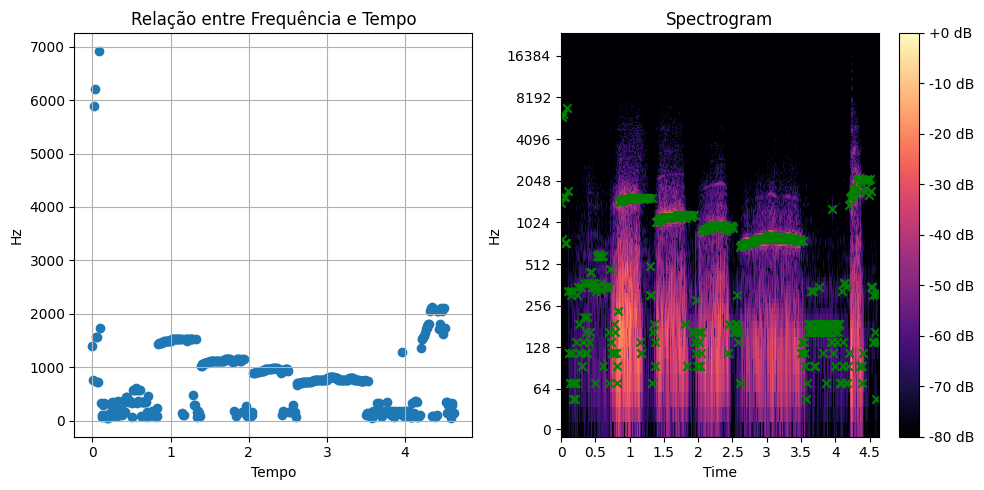

In [9]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('./musics/musics_wav/assovio.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes, ignore_index=True)
print(len(df_concat))
freq_2 = frequencies

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

plt.tight_layout()
plt.show()

409


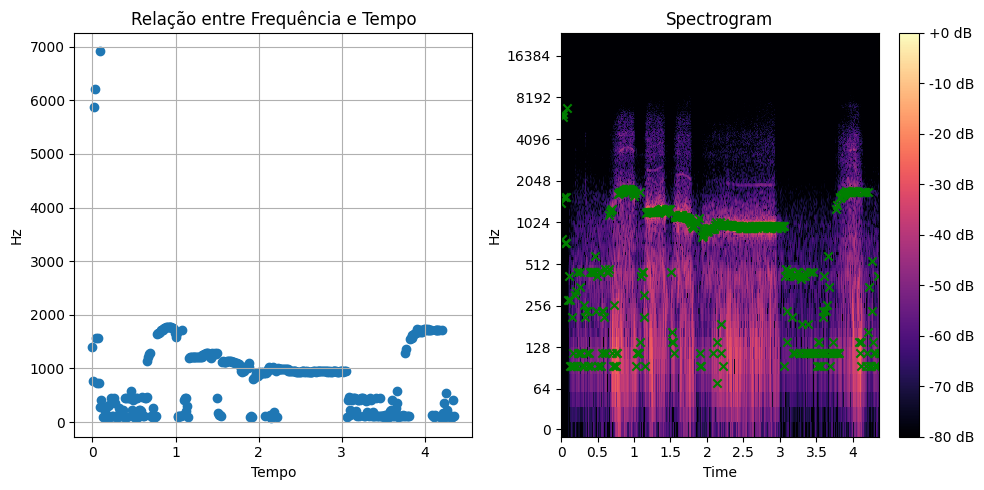

In [10]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes_freq1 = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('musics/musics_wav/joao_assovio.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes_freq1.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste2 = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes_freq1, ignore_index=True)
print(len(df_concat))

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

freq_1 = frequencies

plt.tight_layout()
plt.show()

43365


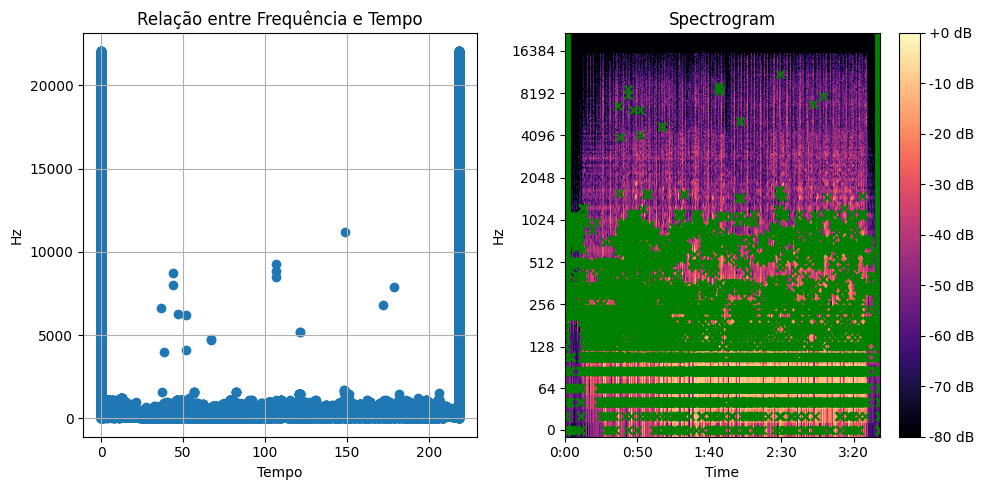

In [11]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes_freq1 = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('./musics/musics_wav/dido.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes_freq1.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste_dido = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes_freq1, ignore_index=True)
print(len(df_concat))

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

freq_1 = frequencies

plt.tight_layout()
plt.show()

277


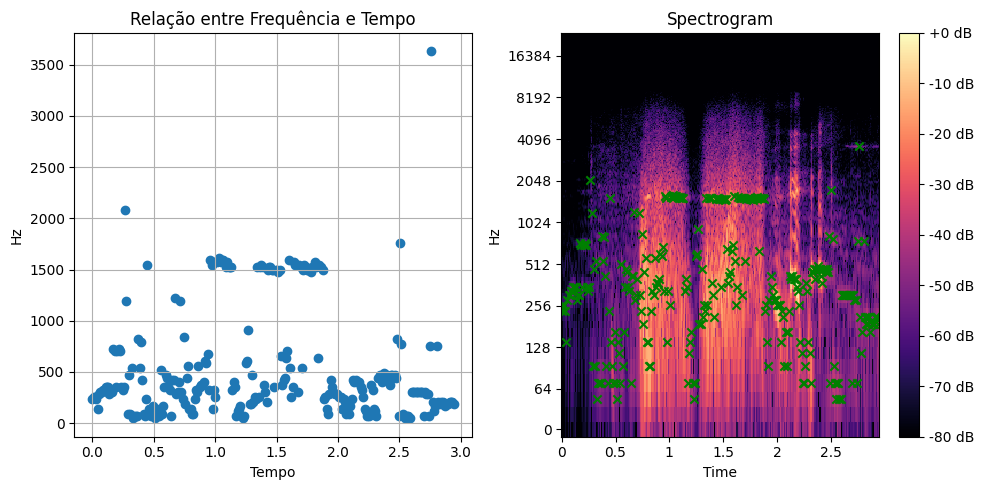

In [12]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes_freq1 = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('musics/musics_wav/moli_assovio_2.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes_freq1.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste3 = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes_freq1, ignore_index=True)
print(len(df_concat))

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

freq_1 = frequencies

plt.tight_layout()
plt.show()

150303


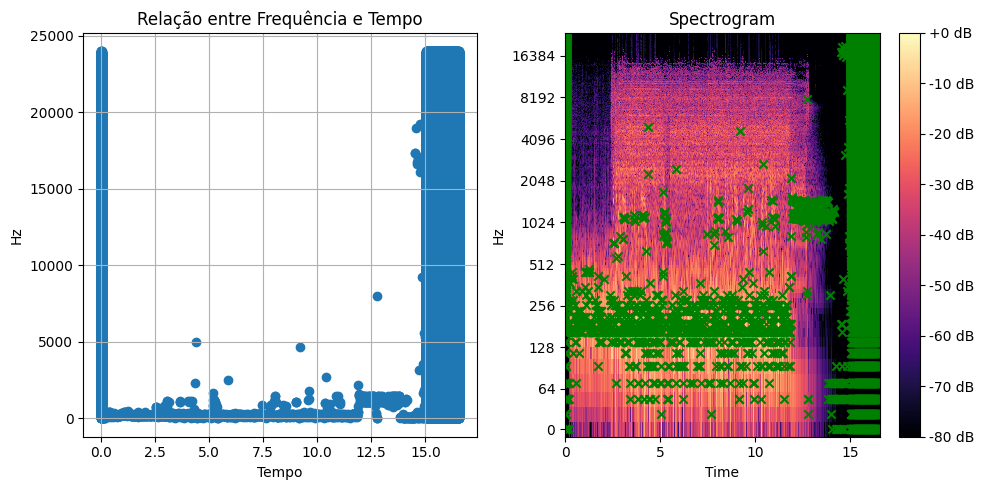

In [13]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes_freq1 = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('musics/musics_wav/ratos.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes_freq1.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste4 = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes_freq1, ignore_index=True)
print(len(df_concat))

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

freq_1 = frequencies

plt.tight_layout()
plt.show()

13373


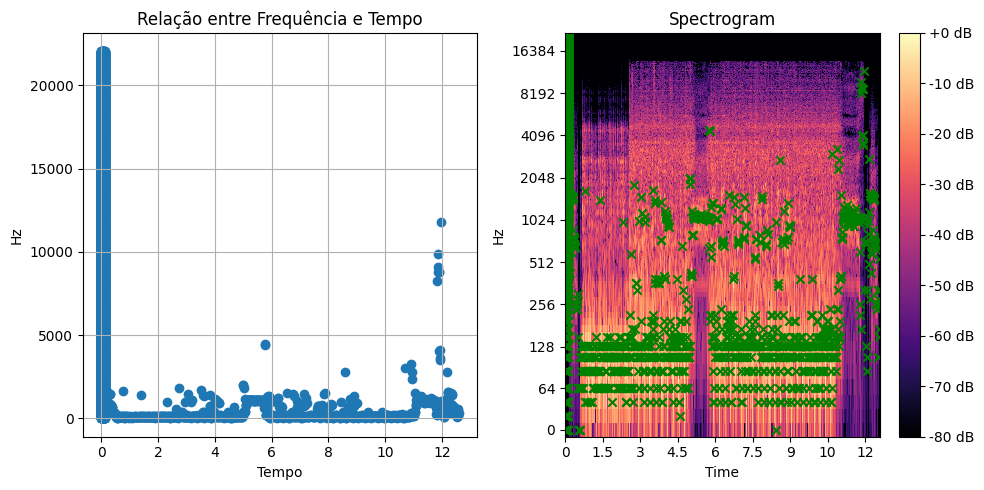

In [14]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes_freq1 = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('musics/musics_wav/ratos_cover.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes_freq1.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste5 = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes_freq1, ignore_index=True)
print(len(df_concat))

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

freq_1 = frequencies

plt.tight_layout()
plt.show()

# CREATE DF FOR TRAINING

In [15]:
teste['target'] = 0
# teste['artist'] = 'Dido - Cover 1'
# teste['music'] = 'Thank You'

teste2['target'] = 1
# teste2['artist'] = 'Dido'
# teste2['music'] = 'Thank You'

teste3['target'] = 2
# teste3['artist'] = 'Dido - Cover 2'
# teste3['music'] = 'Thank You'

teste4['target'] = 3
# teste4['artist'] = 'Ratos de Porão'
# teste4['music'] = 'Caos'

teste5['target'] = 4
# teste5['artist'] = 'Soulfly'
# teste5['music'] = 'Caos'

teste_dido['target'] = 5

In [16]:
test_final = pd.concat([teste, teste2, teste3, teste4, teste5, teste_dido], ignore_index = True)
target = test_final.pop('target')

In [17]:
test_final.head(5)

,Frequencia,Tempo
0,46.8750,0.181333
1,46.8750,0.202667
2,46.8750,3.573333
3,46.8750,4.586667
4,70.3125,0.128000


# MODELING: EXTRACT AND NORMALIZE

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import time
import joblib 
import pickle
from sklearn.pipeline import make_pipeline

In [19]:
X = test_final
y = target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
scaler = StandardScaler()

teste

In [22]:
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# X_test_scaled = scaler.transform(X_test.astype(np.float64))

In [23]:
# categorical_cols = ['artist', 'music']
# numerical_cols = ['Frequencia', 'Tempo']

In [24]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_cols),
#         ('cat', OneHotEncoder(), categorical_cols)
#     ])

In [25]:
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

In [26]:
# X_train_n = X_train_transformed / 255
# X_test_n = X_test_transformed / 255

X_train_n = X_train / 255
X_test_n = X_test / 255

In [27]:
pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train_n)
X_test_pca = pca.transform(X_test_n)

In [28]:
# print(f"dados de treino: {X_train_transformed.shape}")
# print(f"dados de teste: {X_test_transformed.shape}")

print(f"dados de treino: {X_train.shape}")
print(f"dados de teste: {X_test.shape}")

dados de treino: (166529, 2)
dados de teste: (41633, 2)


In [29]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# KNN

In [30]:
k_values = list(range(2, 15))
metrics = []

In [31]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train_int)
    
    y_test_int_pred = knn.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test_int, y_test_int_pred)
    metrics.append({
        'k': k,
        'accuracy': test_accuracy,
        'classification_report': classification_report(y_test_int, y_test_int_pred, output_dict=True),
    })

In [32]:
best_metric = None

for metric in metrics:
    if best_metric is None or metric['accuracy'] > best_metric['accuracy']:
        best_metric = metric


if best_metric:
    print(f'Best K = {best_metric["k"]}')
    k_best = best_metric["k"]
    print(f'Best Test Accuracy: {best_metric["accuracy"] * 100:.2f}%')
    print('Best Classification Report:')
    print(classification_report(y_test_int, knn.predict(X_test_pca)))
conf_matrix = confusion_matrix(y_test_int, y_test_int_pred)


Best K = 4
Best Test Accuracy: 91.95%
Best Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.51        90
           1       0.46      0.52      0.49        75
           2       0.51      0.34      0.41        62
           3       1.00      0.97      0.98     30000
           4       0.41      0.66      0.50      2654
           5       0.85      0.76      0.80      8752

    accuracy                           0.91     41633
   macro avg       0.62      0.63      0.62     41633
weighted avg       0.93      0.91      0.91     41633



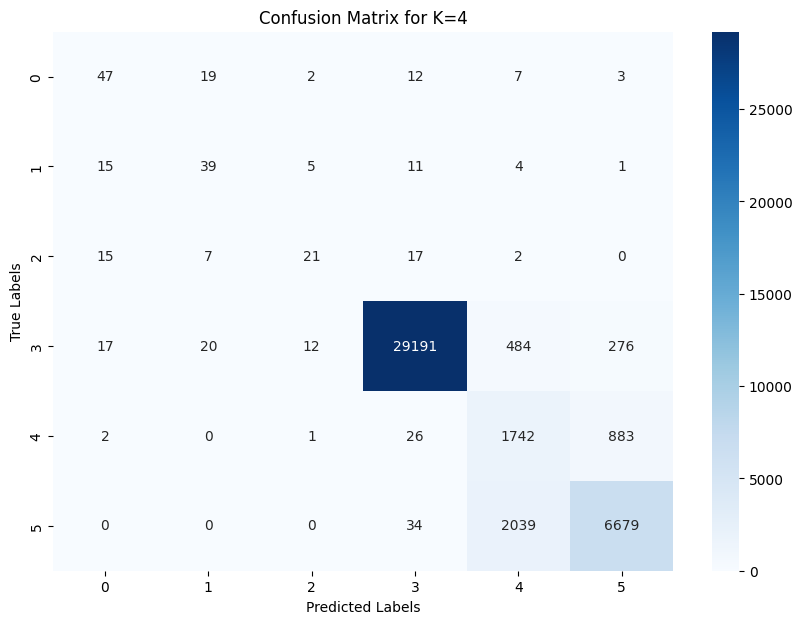

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for K={k_best}')
plt.show()

In [34]:
knn_best = KNeighborsClassifier(n_neighbors=k_best)

In [35]:
pipe = make_pipeline(scaler, knn_best)

# SVM

In [36]:
# svc = SVC(random_state=42)
# svc.fit(X_train_pca, y_train)

# y_pred_initial = svc.predict(X_test_pca)
# initial_accuracy = accuracy_score(y_test, y_pred_initial)
# print(f'Acurácia do modelo SVC: {initial_accuracy:.4f}')

# print("Classification Report:")
# print(classification_report(y_test, y_pred_initial))

In [37]:
# conf_matrix = confusion_matrix(y_test, y_pred_initial)

# plt.figure(figsize=(8, 6))
# plt.imshow(conf_matrix, cmap=plt.cm.Blues)
# plt.title('Matriz de Confusão - Modelo Inicial')
# plt.colorbar()

# plt.ylabel('Classe Real')
# plt.xlabel('Classe Predita')
# plt.tight_layout()

# thresh = conf_matrix.max() / 2.
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         plt.text(j, i, format(conf_matrix[i, j], 'd'),
#                  ha="center", va="center",
#                  color="white" if conf_matrix[i, j] > thresh else "black")

# plt.show()

# RESULTS

In [38]:
models = [
    # ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=k_best)),
]

In [39]:
results = []

for model_name, model in models:
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    runtime = end_time - start_time
    
    results.append({
        'Modelo': model_name,
        'Acurácia %': round(accuracy * 100, 2),
        'Recall %': round(recall * 100, 2),
        'F1-score %': round(f1_score * 100, 2),
        'Tempo de Execução (s)': round(runtime, 2)
    })

    

In [40]:
resultados_df = pd.DataFrame(results)

print(resultados_df)

  Modelo  Acurácia %  Recall %  F1-score %  Tempo de Execução (s)
0    KNN       91.95     91.95       92.43                   4.48


In [41]:
teste = knn.predict(X_test_pca)

In [42]:
cont0 = 0
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0

for i in range(len(teste)):
    if teste[i] == 5:
        cont5 +=1
    elif teste[i] == 4:
        cont4 += 1       
    elif teste[i] == 3:
        cont3 += 1
    elif teste[i] == 2:
        cont2 += 1
    elif teste[i] == 1:
        cont1 += 1
    elif teste[i] == 0:
        cont0 += 1

print(f'Frequências similares a 0: {cont0}')
print(f'Frequências similares a 1: {cont1}')
print(f'Frequências similares a 2: {cont2}')
print(f'Frequências similares a 3: {cont3}')
print(f'Frequências similares a 4: {cont4}')
print(f'Frequências similares a 5: {cont5}')

Frequências similares a 0: 96
Frequências similares a 1: 85
Frequências similares a 2: 41
Frequências similares a 3: 29291
Frequências similares a 4: 4278
Frequências similares a 5: 7842


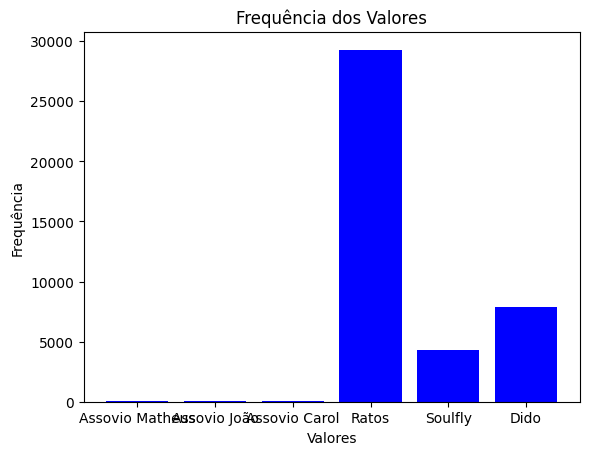

In [43]:
labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly', 'Dido']
frequencies = [cont0, cont1, cont2, cont3, cont4, cont5]

plt.bar(labels, frequencies, color='blue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores')
plt.show()

In [44]:
joblib.dump(pipe, 'model.pkl')

['model.pkl']

In [45]:
knn_from_joblib = joblib.load('model.pkl')

## Geração do Teste com um audio similar ao que foi testado no modelo

277


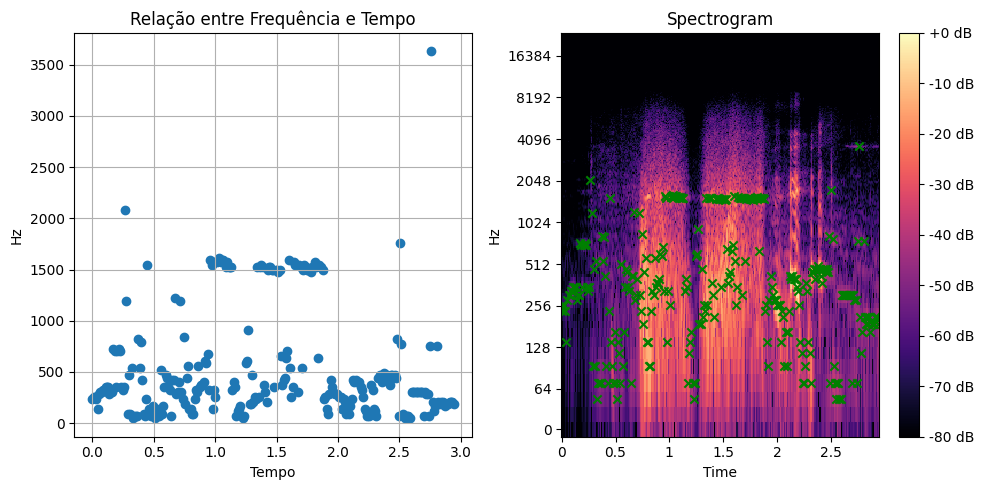

In [46]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('musics/musics_wav/moli_assovio_2.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste4 = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes, ignore_index=True)
print(len(df_concat))
freq_2 = frequencies

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

plt.tight_layout()
plt.show()

In [47]:
teste4.head(5)

,Frequencia,Tempo
0,46.875,0.330667
1,46.875,0.512000
2,46.875,1.226667
3,46.875,2.549333
4,46.875,2.581333


In [48]:
knn_from_joblib.fit(X_train, y_train)
teste = knn_from_joblib.predict(teste4)

In [49]:
print("After save:",knn_from_joblib.predict(teste4))

After save: [0 5 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 4 4 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 4 4 4
 4 1 4 4 4 4 3 3 3 2 2 4 4 4 0 2 2 3 3 3 3 3 3 2 3 2 2 2 2 2 2 2 2 2 3 3 5
 2 2 2 2 2 2 3 2 4 3 3 2 3 2 2 3 2 5 2 2 3 2 2 2 2 2 5 1 2 2 2 2 2 2 2 4 5
 0 0 2 2 2 0 5 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 5 2 2 5 5 5 2 2 2 2 2 2 0 0 5
 5 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 5 2 2 2 2 1 1 5 2 2 2 2 4 2 3
 2 2 2 2 2 2 2 2 2 2 2 5 5 2 2 0 2 2 2 2 2 2 5 4 4 4 2 4 4 0 0 0 4 4 0 2 5
 4 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 4 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4]


Frequências similares a 0: 19
Frequências similares a 1: 15
Frequências similares a 2: 175
Frequências similares a 3: 19
Frequências similares a 4: 30


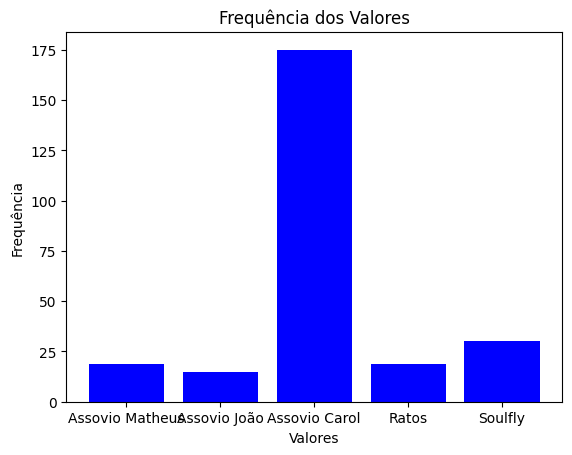

In [50]:
cont0 = 0
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0

for i in range(len(teste)):
    if teste[i] == 4:
        cont4 += 1       
    elif teste[i] == 3:
        cont3 += 1
    elif teste[i] == 2:
        cont2 += 1
    elif teste[i] == 1:
        cont1 += 1
    elif teste[i] == 0:
        cont0 += 1

print(f'Frequências similares a 0: {cont0}')
print(f'Frequências similares a 1: {cont1}')
print(f'Frequências similares a 2: {cont2}')
print(f'Frequências similares a 3: {cont3}')
print(f'Frequências similares a 4: {cont4}')

labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly']
frequencies = [cont0, cont1, cont2, cont3, cont4]

plt.bar(labels, frequencies, color='blue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores')
plt.show()

In [51]:
teste2_novo = teste2.pop('target')

In [52]:
teste2.head(5)

,Frequencia,Tempo
0,70.3125,2.144000
1,93.7500,0.128000
2,93.7500,0.138667
3,93.7500,0.160000
4,93.7500,0.181333


In [53]:
knn_from_joblib.fit(X_train, y_train)
teste = knn_from_joblib.predict(teste2)
print("After save:",teste)

After save: [4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 1 4 4 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 4 0 1 1 1 0 1 1 4 4 0 0 3 3 3 3 3 3 3 3 3 4 0 3 3 3 4 1
 4 4 1 1 3 1 1 3 4 5 3 4 1 0 5 0 0 4 5 1 4 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 2 1 1 5 0 1 0 0 3 5 5 5 1 1 0 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 0 0 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 3 0 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 3 5]


Frequências similares a 0: 43
Frequências similares a 1: 313
Frequências similares a 2: 2
Frequências similares a 3: 19
Frequências similares a 4: 23


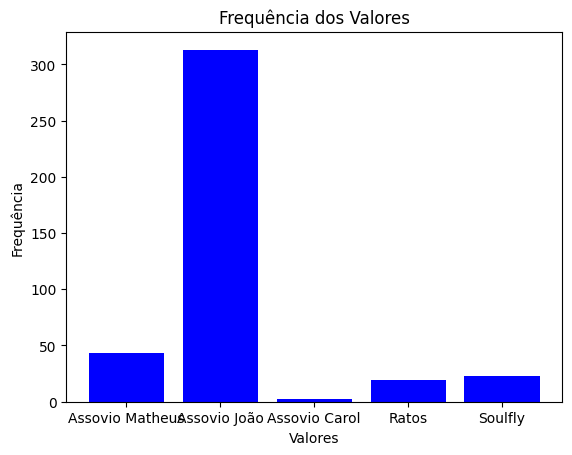

In [54]:
cont0 = 0
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0

for i in range(len(teste)):
    if teste[i] == 4:
        cont4 += 1       
    elif teste[i] == 3:
        cont3 += 1
    elif teste[i] == 2:
        cont2 += 1
    elif teste[i] == 1:
        cont1 += 1
    elif teste[i] == 0:
        cont0 += 1

print(f'Frequências similares a 0: {cont0}')
print(f'Frequências similares a 1: {cont1}')
print(f'Frequências similares a 2: {cont2}')
print(f'Frequências similares a 3: {cont3}')
print(f'Frequências similares a 4: {cont4}')

labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly']
frequencies = [cont0, cont1, cont2, cont3, cont4]

plt.bar(labels, frequencies, color='blue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores')
plt.show()

20413


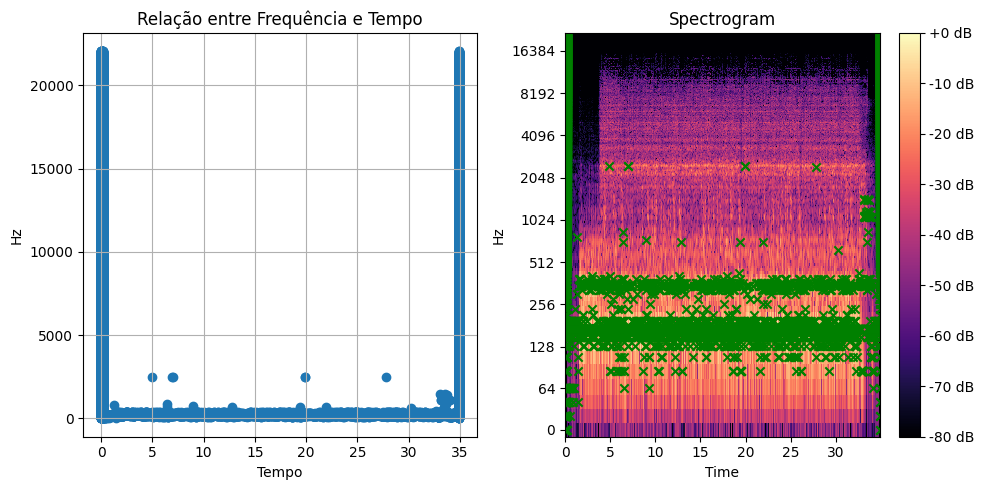

In [55]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('./musics/musics_wav/tetse.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste7 = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes, ignore_index=True)
print(len(df_concat))
freq_2 = frequencies

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

plt.tight_layout()
plt.show()

In [56]:
teste7.head(5)

,Frequencia,Tempo
0,0.0,0.00000
1,0.0,0.01161
2,0.0,0.02322
3,0.0,0.03483
4,0.0,0.04644


In [57]:
knn_from_joblib.fit(X_train, y_train)
teste123 = knn_from_joblib.predict(teste7)
print("After save:",teste123)

After save: [3 3 4 ... 4 3 3]


Frequências similares a 0: 0.34%
Frequências similares a 1: 0.05%
Frequências similares a 2: 0.19%
Frequências similares a 3: 11.50%
Frequências similares a 4: 65.52%


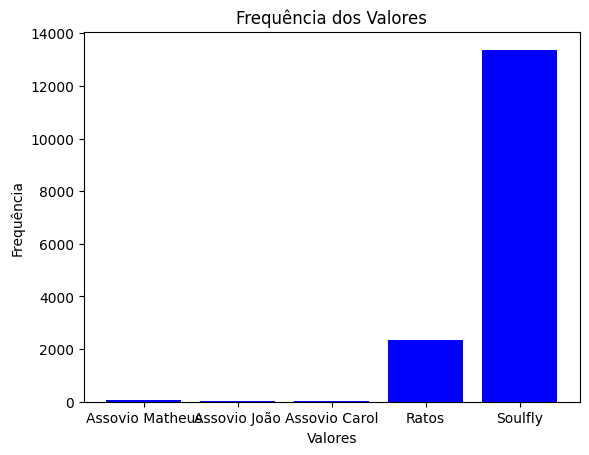

In [58]:
cont0 = 0
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0

total = len(teste123)

for i in range(total):
    if teste123[i] == 4:
        cont4 += 1       
    elif teste123[i] == 3:
        cont3 += 1
    elif teste123[i] == 2:
        cont2 += 1
    elif teste123[i] == 1:
        cont1 += 1
    elif teste123[i] == 0:
        cont0 += 1

print(f'Frequências similares a 0: {(cont0 / total) * 100:.2f}%')
print(f'Frequências similares a 1: {(cont1 / total) * 100:.2f}%')
print(f'Frequências similares a 2: {(cont2 / total) * 100:.2f}%')
print(f'Frequências similares a 3: {(cont3 / total) * 100:.2f}%')
print(f'Frequências similares a 4: {(cont4 / total) * 100:.2f}%')

labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly']
frequencies = [cont0, cont1, cont2, cont3, cont4]

plt.bar(labels, frequencies, color='blue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores')
plt.show()

46083


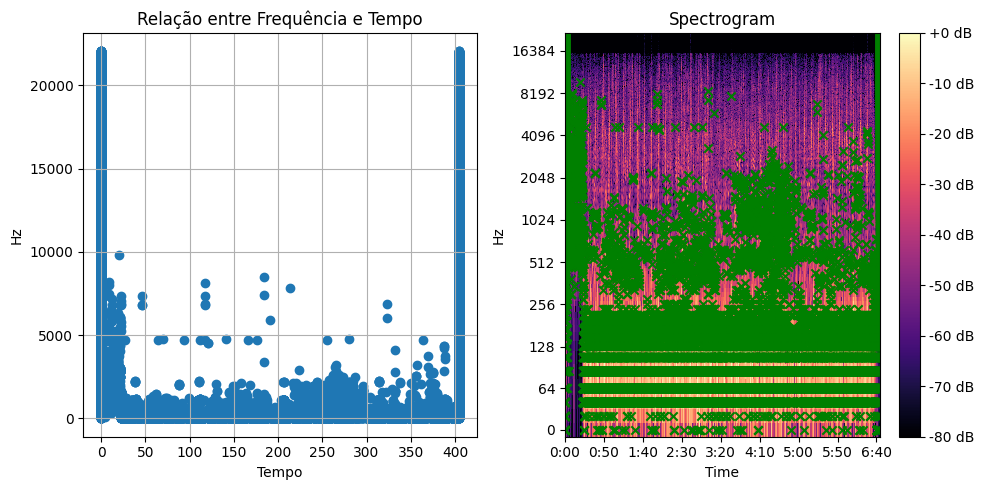

In [59]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('musics/musics_wav/eminem.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste_em = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes, ignore_index=True)
print(len(df_concat))
freq_2 = frequencies

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

plt.tight_layout()
plt.show()

In [60]:
knn_from_joblib.fit(X_train, y_train)
teste1234 = knn_from_joblib.predict(teste_em)
print("After save:",teste1234)

After save: [3 3 4 ... 5 5 5]


Frequências similares a 0: 0.21%
Frequências similares a 1: 0.15%
Frequências similares a 2: 0.06%
Frequências similares a 3: 2.30%
Frequências similares a 4: 15.49%
Frequências similares a 5: 81.79%


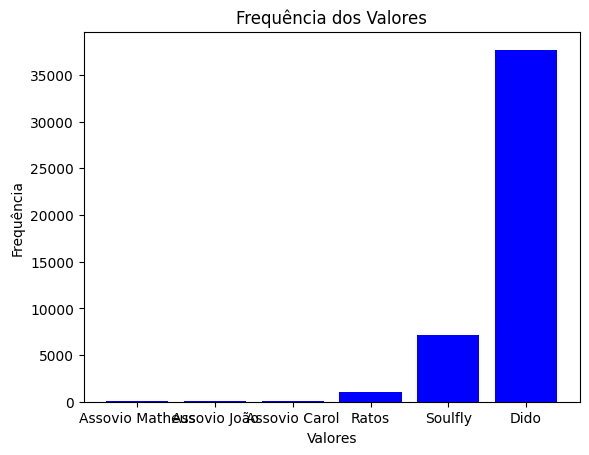

In [61]:
cont0 = 0
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0

total = len(teste1234)

for i in range(len(teste1234)):
    if teste1234[i] == 5:
        cont5 +=1
    elif teste1234[i] == 4:
        cont4 += 1       
    elif teste1234[i] == 3:
        cont3 += 1
    elif teste1234[i] == 2:
        cont2 += 1
    elif teste1234[i] == 1:
        cont1 += 1
    elif teste1234[i] == 0:
        cont0 += 1

print(f'Frequências similares a 0: {(cont0 / total) * 100:.2f}%')
print(f'Frequências similares a 1: {(cont1 / total) * 100:.2f}%')
print(f'Frequências similares a 2: {(cont2 / total) * 100:.2f}%')
print(f'Frequências similares a 3: {(cont3 / total) * 100:.2f}%')
print(f'Frequências similares a 4: {(cont4 / total) * 100:.2f}%')
print(f'Frequências similares a 5: {(cont5 / total) * 100:.2f}%')

labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly','Dido']
frequencies = [cont0, cont1, cont2, cont3, cont4, cont5]

plt.bar(labels, frequencies, color='blue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores')
plt.show()

In [62]:
# from IPython.display import Audio
# import numpy as np
# import librosa
# import librosa.display as dp
# import matplotlib.pyplot as plt
# import pandas as pd

# df_hashes = []

# # https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

# y, sr = librosa.load('tim_maia.wav', sr=None, mono=True)
# Audio(y, rate= sr)

# S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
# S = np.abs(S)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

# img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
# fig.colorbar(img, ax=ax2, format='%+2.0f dB')
# ax2.set_title('Spectrogram')

# # Encontrar os índices dos valores máximos
# max_indices = np.argwhere(S == np.max(S, axis=0))

# # Obter os tempos e as frequências correspondentes
# times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
# frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

# ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

# df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

# teste_leans = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

# df_concat = pd.concat(df_hashes, ignore_index=True)
# print(len(df_concat))
# freq_2 = frequencies

# ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
# ax1.set_title('Relação entre Frequência e Tempo')
# ax1.set_ylabel('Hz')
# ax1.set_xlabel('Tempo')
# ax1.grid(True)

# plt.tight_layout()
# plt.show()

In [63]:
# knn_from_joblib.fit(X_train, y_train)
# teste12345 = knn_from_joblib.predict(teste_leans)
# print("After save:",teste12345)

In [64]:
# cont0 = 0
# cont1 = 0
# cont2 = 0
# cont3 = 0
# cont4 = 0
# cont5 = 0
# cont_22 = 0

# total = len(teste12345)

# for i in range(len(teste12345)):
#     if teste12345[i] == 5:
#         cont5 +=1
#     elif teste12345[i] == 4:
#         cont4 += 1       
#     elif teste12345[i] == 3:
#         cont3 += 1
#     elif teste12345[i] == 2:
#         cont2 += 1
#     elif teste12345[i] == 1:
#         cont1 += 1
#     elif teste12345[i] == 0:
#         cont0 += 1
#     else:
#         cont_22 +=1

# print(f'Frequências similares a 0: {(cont0 / total) * 100:.2f}%')
# print(f'Frequências similares a 1: {(cont1 / total) * 100:.2f}%')
# print(f'Frequências similares a 2: {(cont2 / total) * 100:.2f}%')
# print(f'Frequências similares a 3: {(cont3 / total) * 100:.2f}%')
# print(f'Frequências similares a 4: {(cont4 / total) * 100:.2f}%')
# print(f'Frequências similares a 5: {(cont5 / total) * 100:.2f}%')
# print(f'Frequências similares a 6: {(cont_22 / total) * 100:.2f}%')

# labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly','Dido', 'False']
# frequencies = [cont0, cont1, cont2, cont3, cont4, cont5, cont_22]

# plt.bar(labels, frequencies, color='blue')
# plt.xlabel('Valores')
# plt.ylabel('Frequência')
# plt.title('Frequência dos Valores')
# plt.show()

394329


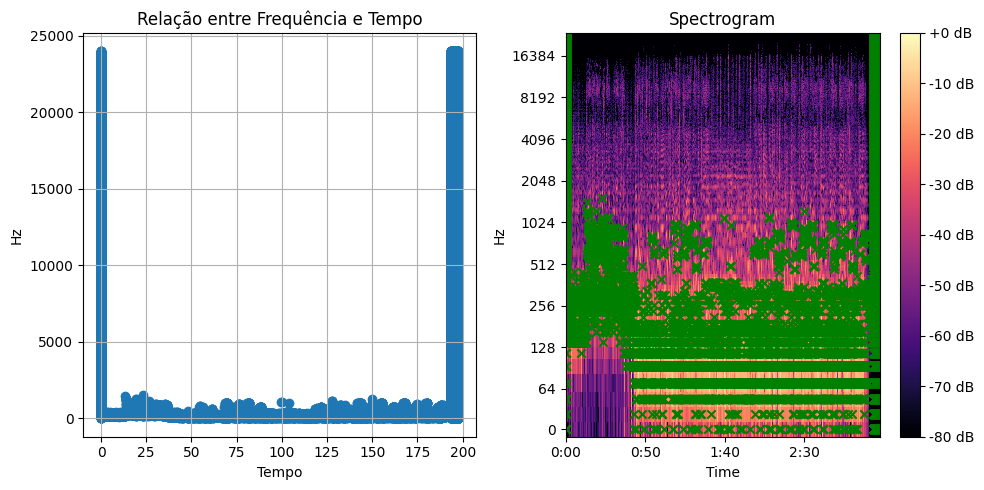

In [72]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('musics/musics_wav/dido2.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste_dc2 = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes, ignore_index=True)
print(len(df_concat))
freq_2 = frequencies

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

plt.tight_layout()
plt.show()

In [73]:
teste_dc2.head(5)

,Frequencia,Tempo
0,0.0,0.000000
1,0.0,0.010667
2,0.0,0.021333
3,0.0,0.032000
4,0.0,43.232000


In [74]:
knn_from_joblib.fit(X_train, y_train)
teste_dc = knn_from_joblib.predict(teste_dc2)
print("After save:",teste_dc)

After save: [3 3 4 ... 5 5 5]


Frequências similares a 0: 0.01%
Frequências similares a 1: 0.01%
Frequências similares a 2: 0.02%
Frequências similares a 3: 1.19%
Frequências similares a 4: 0.09%
Frequências similares a 5: 98.68%


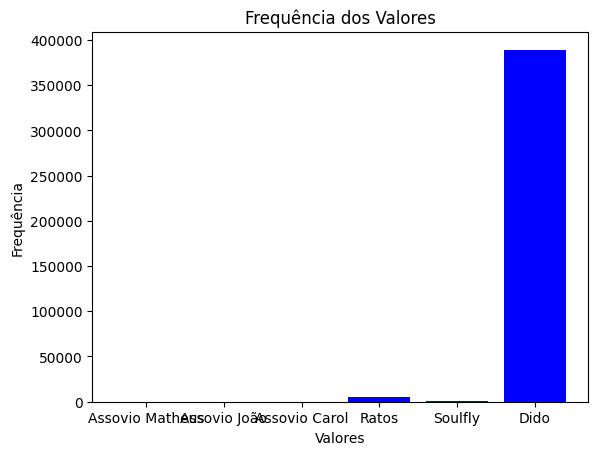

In [75]:
cont0 = 0
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0

total = len(teste_dc)

for i in range(len(teste_dc)):
    if teste_dc[i] == 5:
        cont5 +=1
    elif teste_dc[i] == 4:
        cont4 += 1       
    elif teste_dc[i] == 3:
        cont3 += 1
    elif teste_dc[i] == 2:
        cont2 += 1
    elif teste_dc[i] == 1:
        cont1 += 1
    elif teste_dc[i] == 0:
        cont0 += 1

print(f'Frequências similares a 0: {(cont0 / total) * 100:.2f}%')
print(f'Frequências similares a 1: {(cont1 / total) * 100:.2f}%')
print(f'Frequências similares a 2: {(cont2 / total) * 100:.2f}%')
print(f'Frequências similares a 3: {(cont3 / total) * 100:.2f}%')
print(f'Frequências similares a 4: {(cont4 / total) * 100:.2f}%')
print(f'Frequências similares a 5: {(cont5 / total) * 100:.2f}%')

labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly','Dido']
frequencies = [cont0, cont1, cont2, cont3, cont4, cont5]

plt.bar(labels, frequencies, color='blue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores')
plt.show()

6412


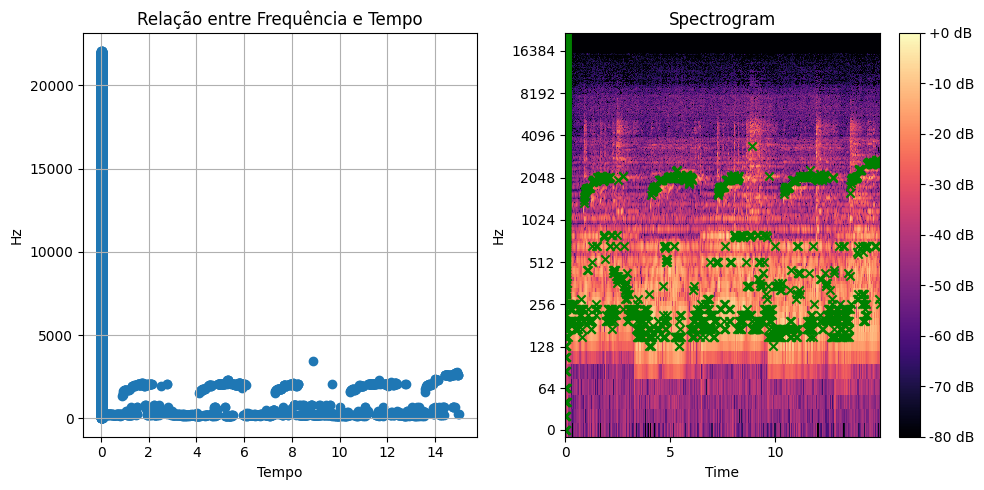

In [77]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('musics/musics_wav/wind of change - assovio.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste_woc = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes, ignore_index=True)
print(len(df_concat))
freq_2 = frequencies

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

plt.tight_layout()
plt.show()

In [78]:
knn_from_joblib.fit(X_train, y_train)
teste_scorp = knn_from_joblib.predict(teste_woc)
print("After save:",teste_scorp)

After save: [3 3 4 ... 4 4 5]


Frequências similares a 0: 2.11%
Frequências similares a 1: 0.76%
Frequências similares a 2: 0.83%
Frequências similares a 3: 11.46%
Frequências similares a 4: 67.37%
Frequências similares a 5: 17.47%


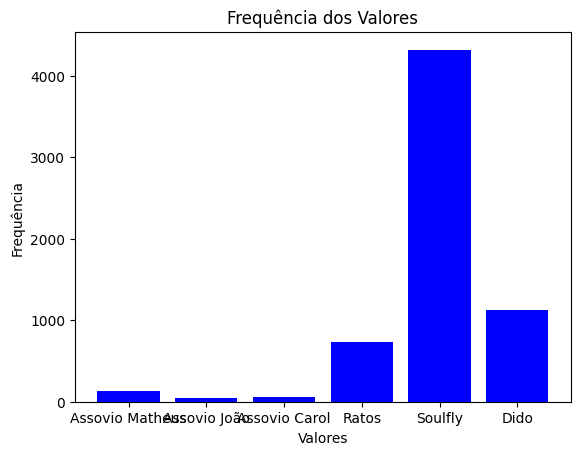

In [79]:
cont0 = 0
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0

total = len(teste_scorp)

for i in range(len(teste_scorp)):
    if teste_scorp[i] == 5:
        cont5 +=1
    elif teste_scorp[i] == 4:
        cont4 += 1       
    elif teste_scorp[i] == 3:
        cont3 += 1
    elif teste_scorp[i] == 2:
        cont2 += 1
    elif teste_scorp[i] == 1:
        cont1 += 1
    elif teste_scorp[i] == 0:
        cont0 += 1

print(f'Frequências similares a 0: {(cont0 / total) * 100:.2f}%')
print(f'Frequências similares a 1: {(cont1 / total) * 100:.2f}%')
print(f'Frequências similares a 2: {(cont2 / total) * 100:.2f}%')
print(f'Frequências similares a 3: {(cont3 / total) * 100:.2f}%')
print(f'Frequências similares a 4: {(cont4 / total) * 100:.2f}%')
print(f'Frequências similares a 5: {(cont5 / total) * 100:.2f}%')

labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly','Dido']
frequencies = [cont0, cont1, cont2, cont3, cont4, cont5]

plt.bar(labels, frequencies, color='blue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores')
plt.show()